# **Lecture 01 - Linear Algebra**: Supplementary Interactive Material

-------------------------------------------------------------------------

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Matrix Operations in Python:

Many simple matrix operations are easily implemented in python. Consider, for example:

$$A = \begin{bmatrix} 3 & -2 & 1 \\
4 & 13 & -4 \\
1 & 2 & 3 \end{bmatrix}$$ 

**Define a Matrix**

In [6]:
A = np.array([
    [3, -2,  1],
    [4, 13,  4],
    [1,  2,  3]
])

**Matrix Addition** 


In [7]:
print(A + A)

[[ 6 -4  2]
 [ 8 26  8]
 [ 2  4  6]]


**Transpose**

In [10]:
print(A.T)

[[ 3  4  1]
 [-2 13  2]
 [ 1  4  3]]


**Matrix Inverse**

In [11]:
print(np.linalg.inv(A))

[[ 0.29807692  0.07692308 -0.20192308]
 [-0.07692308  0.07692308 -0.07692308]
 [-0.04807692 -0.07692308  0.45192308]]


**Determinant**

In [12]:
print(np.linalg.det(A))

103.99999999999999


**Decompositions**

In [22]:
QR = np.linalg.qr(A)

In [23]:
print(QR[0]) # Or Q[1] to print R

[[-0.58834841  0.80185231 -0.10430257]
 [-0.78446454 -0.59729815 -0.16688411]
 [-0.19611614 -0.01636433  0.98044412]]


In [25]:
SVD = np.linalg.svd(A)

In [27]:
print(SVD[0]) #Indices 0,1,2 for Sigma, U V^T respectively

[[ 0.04760672  0.92802605 -0.36946076]
 [-0.97688999 -0.03390342 -0.21103673]
 [-0.20837357  0.37096928  0.90496533]]


## Visualizing the P-Norm of the Unit Ball:

We say the unit ball with the p norm as a distance function is:

$$ B_p = \{ x\in R^n ~|~ \|x\|_p \le 1 \}$$
$$\|x\|_p = \left(\sum_{k=1}^n |x_k|^p\right) ^{1/p}$$


In [5]:
x, y   = np.linspace(-1.2, 1.2, 200), np.linspace(-1.2, 1.2, 200) 
X, Y   = np.meshgrid(x, y)          

def p_mask(p, X=X, Y=Y):
    """Return a masked array of ‖(x,y)‖_p, masked outside the unit p-ball."""
    if np.isinf(p):
        P = np.maximum(np.abs(X), np.abs(Y))
    else:
        P = (np.abs(X)**p + np.abs(Y)**p)**(1/p)
        
    return np.ma.masked_where(P > 1.0, P)

p_vals = np.concatenate([[1], np.logspace(0, np.log10(100), 60)]) #NUMBER OF "frames" 

fig, ax = plt.subplots(figsize=(5, 5))
im      = ax.imshow(p_mask(p_vals[0]),
                    extent=[-1.2,1.2,-1.2,1.2],
                    origin='lower',
                    cmap='viridis')
ax.set_aspect('equal')
txt = ax.text(0.02, 0.95, '', transform=ax.transAxes,
              color='black', fontsize=12, ha='left', va='top')

def update(frame):
    p = p_vals[frame]
    im.set_data(p_mask(p))
    txt.set_text(rf'$\|(x,y)\|_{{{p:.2f}}} \leq 1$')
    return im, txt

ani = FuncAnimation(fig, update, frames=len(p_vals),
                    interval=80, blit=True, repeat=True)

plt.close(fig)         
HTML(ani.to_jshtml())   


## Visualizing Similar Matrices:

Recall, that two matrices  A and B are similar if $\exists V,V^{-1} $ such that:

$$ A = VBV^{-1}$$

Let us consider the action of some matrix A, which shears our poor smiley face on a 45 degree diagonal. We will find a Similar matrix B, and show how with the right choices of $V$ and $V^{-1}$ the same action can be applied.

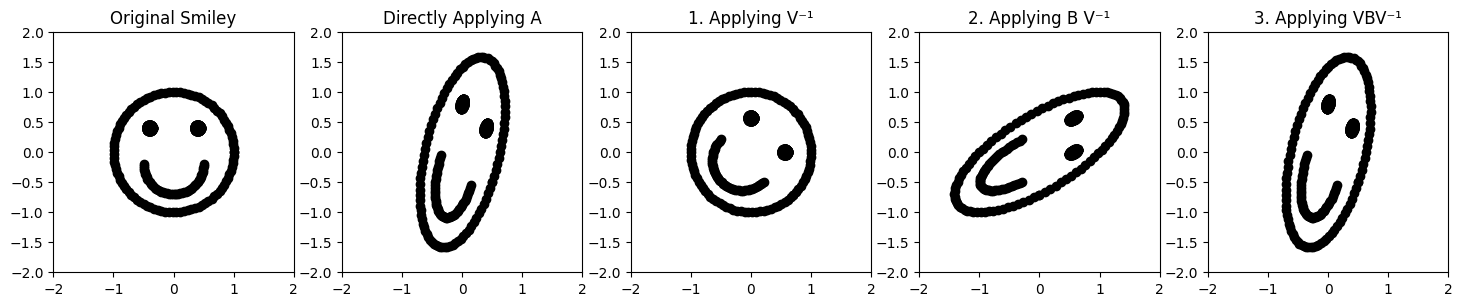

In [29]:
# --- Matrix Definitions ---
k = 1.0  # Shear factor
B = np.array([[1, k],
              [0, 1]])  # Shear along x-axis

theta = np.radians(45)  # Rotation angle
V = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
V_inv = V.T  # Since V is orthogonal, V⁻¹ = Vᵗ

# Compute A = VBV⁻¹
A = V @ B @ V_inv

# --- Smiley Face Point Cloud ---
t = np.linspace(0, 2 * np.pi, 100)

# Face outline (circle)
face_x = np.cos(t)
face_y = np.sin(t)

# Left Eye
left_eye_x = -0.4 + 0.05 * np.cos(t)
left_eye_y =  0.4 + 0.05 * np.sin(t)

# Right Eye
right_eye_x = 0.4 + 0.05 * np.cos(t)
right_eye_y = 0.4 + 0.05 * np.sin(t)

# Smile (arc)
smile_t = np.linspace(0, np.pi, 50)
smile_x = 0.5 * np.cos(smile_t)
smile_y = -0.5 * np.sin(smile_t) - 0.2

# Combine into single (N,2) array
points = np.vstack((
    np.column_stack((face_x, face_y)),
    np.column_stack((left_eye_x, left_eye_y)),
    np.column_stack((right_eye_x, right_eye_y)),
    np.column_stack((smile_x, smile_y))
))

# --- Apply Transformations ---
points_A = (A @ points.T).T
points_Vinv = (V_inv @ points.T).T
points_Vinv_B = (B @ points_Vinv.T).T
points_Vinv_B_V = (V @ points_Vinv_B.T).T

# --- Plotting ---
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

titles = ["Original Smiley", "Directly Applying A", "1. Applying V⁻¹", "2. Applying B V⁻¹", "3. Applying VBV⁻¹"]
point_sets = [points, points_A, points_Vinv, points_Vinv_B, points_Vinv_B_V]

for ax, title, pts in zip(axes, titles, point_sets):
    ax.scatter(pts[:, 0], pts[:, 1], color='black')
    ax.set_title(title)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')

plt.show()


## Diagonalization


Recall, that A matrix is diagonalizable if $\exists P,P^{-1} $ and a diagonal matrix $D$ such that:

$$ A = PDP^{-1}$$

Let us consider the action of some matrix A, and suppose its action can be thought of as merely stretching along some eigenvectors. If that is the case, there exists some matrix $P^{-1}$ whos action maps these eigenvectors to the standard basis vectors, such that scaling them and returning them back to their original positions via the action of $PD$ has the cumulative effect of simply scaling along the eigenvectors.

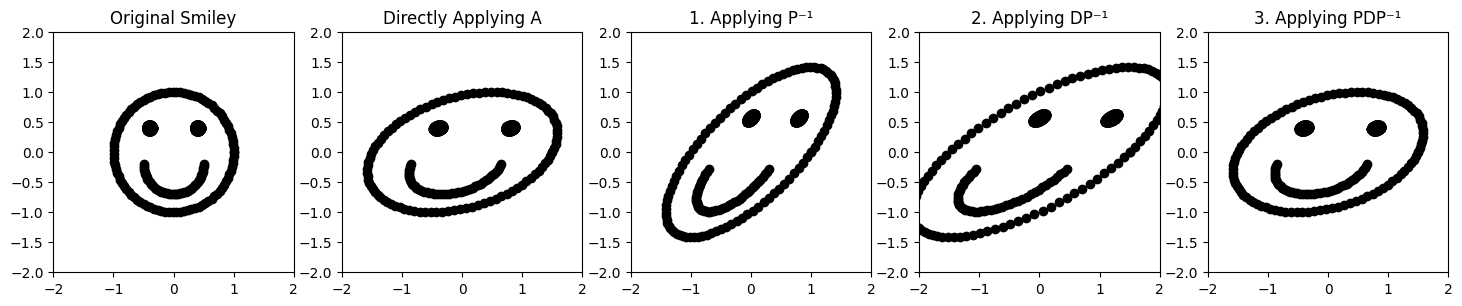

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Diagonalizable Matrix ---
A = np.array([[1.5, 0.5],
              [0, 1]])

# Compute Eigenvalues and Eigenvectors
eigvals, eigvecs = np.linalg.eig(A)
P = eigvecs
P_inv = np.linalg.inv(P)
D = np.diag(eigvals)

# --- Smiley Face Point Cloud ---
t = np.linspace(0, 2 * np.pi, 100)
face_x = np.cos(t)
face_y = np.sin(t)
left_eye_x = -0.4 + 0.05 * np.cos(t)
left_eye_y =  0.4 + 0.05 * np.sin(t)
right_eye_x = 0.4 + 0.05 * np.cos(t)
right_eye_y = 0.4 + 0.05 * np.sin(t)
smile_t = np.linspace(0, np.pi, 50)
smile_x = 0.5 * np.cos(smile_t)
smile_y = -0.5 * np.sin(smile_t) - 0.2

points = np.vstack((
    np.column_stack((face_x, face_y)),
    np.column_stack((left_eye_x, left_eye_y)),
    np.column_stack((right_eye_x, right_eye_y)),
    np.column_stack((smile_x, smile_y))
))

# --- Apply Transformations ---
points_A = (A @ points.T).T
points_Pinv = (P_inv @ points.T).T
points_Pinv_D = (D @ points_Pinv.T).T
points_Pinv_D_P = (P @ points_Pinv_D.T).T

# --- Plotting ---
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

titles = ["Original Smiley", "Directly Applying A", "1. Applying P⁻¹", "2. Applying DP⁻¹", "3. Applying PDP⁻¹"]
point_sets = [points, points_A, points_Pinv, points_Pinv_D, points_Pinv_D_P]

for ax, title, pts in zip(axes, titles, point_sets):
    ax.scatter(pts[:, 0], pts[:, 1], color='black')
    ax.set_title(title)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')

plt.show()
